In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import itertools
from matplotlib import rcParams
from collections import defaultdict
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['axes.formatter.useoffset'] = False


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Loading datasets:

In [2]:
fiveeight = pd.read_csv("../../Analysis/diffBUM-HMM/5.8S_negative_control_test_identical_conditions_diff_BUM_HMM_analysed.txt",\
                       sep="\t",\
                       index_col=0,
                       header=0)
five = pd.read_csv("../../Analysis/diffBUM-HMM/5S_negative_control_test_identical_conditions_diff_BUM_HMM_analysed.txt",\
                       sep="\t",\
                       index_col=0,
                       header=0)
twentyfive = pd.read_csv("../../Analysis/diffBUM-HMM/25S_negative_control_test_identical_conditions_diff_BUM_HMM_analysed.txt",\
                       sep="\t",\
                       index_col=0,
                       header=0)
eighteen = pd.read_csv("../../Analysis/diffBUM-HMM/18S_negative_control_test_identical_conditions_diff_BUM_HMM_analysed.txt",\
                       sep="\t",\
                       index_col=0,
                       header=0)

### Dropping positions with insufficient coverage:

In [3]:
position = fiveeight[fiveeight == -999].dropna().index
fiveeight.drop(position,inplace=True)
position = five[five == -999].dropna().index
five.drop(position,inplace=True)
position = eighteen[eighteen == -999].dropna().index
eighteen.drop(position,inplace=True)
position = twentyfive[twentyfive == -999].dropna().index
twentyfive.drop(position,inplace=True)

### Only the last position had a -999 in the datasets.

In [4]:
fiveeight.head()

,UU,UM,MU,MM
1,1.0,1.678309e-34,1.678309e-34,2.816721e-68
2,1.0,2.699683e-11,2.699683e-11,7.288288e-22
3,1.0,1.647115e-22,1.647115e-22,2.712988e-44
4,1.0,1.879406e-32,1.879406e-32,3.532169e-64
5,1.0,4.654247e-24,4.654247e-24,2.166201e-47


### Something is wrong. The UM and MU collumns have the same values!
Waiting for a fix

### Making violinplots:

#### Gathering all the data from the UM and MU columns that have the posteriors for being differentially modified:

In [5]:
_fiveeight = list(itertools.chain.from_iterable(fiveeight[["UM","MU"]].values))
_five = list(itertools.chain.from_iterable(five[["UM","MU"]].values))
_twentyfive = list(itertools.chain.from_iterable(twentyfive[["UM","MU"]].values))
_eighteen = list(itertools.chain.from_iterable(eighteen[["UM","MU"]].values))

In [6]:
fiveeight[:10]

,UU,UM,MU,MM
1,1.000000,1.678309e-34,1.678309e-34,2.816721e-68
2,1.000000,2.699683e-11,2.699683e-11,7.288288e-22
3,1.000000,1.647115e-22,1.647115e-22,2.712988e-44
4,1.000000,1.879406e-32,1.879406e-32,3.532169e-64
5,1.000000,4.654247e-24,4.654247e-24,2.166201e-47
6,1.000000,2.401017e-14,2.401017e-14,5.764884e-28
7,0.999999,3.115782e-07,3.115782e-07,9.708104e-14
8,1.000000,3.736168e-12,3.736168e-12,1.395895e-23
9,1.000000,4.472711e-14,4.472711e-14,2.000514e-27
10,1.000000,1.333472e-22,1.333472e-22,1.778149e-44


In [7]:
eighteen[:10]

,UU,UM,MU,MM
1,1.000000e+00,1.841495e-18,1.841495e-18,3.391105e-36
2,1.000000e+00,4.451579e-14,4.451579e-14,1.981656e-27
3,1.000000e+00,7.231953e-22,7.231953e-22,5.230114e-43
4,1.000000e+00,4.439537e-17,4.439537e-17,1.970948e-33
5,1.000000e+00,1.880042e-38,1.880042e-38,3.534559e-76
6,1.000000e+00,1.935268e-11,1.935268e-11,3.745262e-22
7,1.000000e+00,3.116479e-21,3.116479e-21,9.712441e-42
8,5.843202e-09,7.643500e-05,7.643500e-05,9.998471e-01
9,3.881934e-19,6.230517e-10,6.230517e-10,1.000000e+00
10,1.030573e-13,3.210253e-07,3.210253e-07,9.999994e-01


In [8]:
_fiveeightMM = list(itertools.chain.from_iterable(fiveeight[["MM"]].values))
_fiveMM = list(itertools.chain.from_iterable(five[["MM"]].values))
_twentyfiveMM = list(itertools.chain.from_iterable(twentyfive[["MM"]].values))
_eighteenMM = list(itertools.chain.from_iterable(eighteen[["MM"]].values))

### Putting it in a dataframe, 25S first:

In [9]:
index = np.arange(0,len(_twentyfive))
values = pd.DataFrame(np.nan,index=index,columns=["5SMM","5.8SMM","18SMM","25SMM","5S","5.8S","18S","25S"])

In [10]:
length = len(_five)-1
values.loc[0:length,"5S"] = _five

length = len(_fiveeight)-1
values.loc[0:length,"5.8S"] = _fiveeight

length = len(_eighteen)-1
values.loc[0:length,"18S"] = _eighteen

length = len(_twentyfive)-1
values.loc[0:length,"25S"] = _twentyfive

length = len(_fiveMM)-1
values.loc[0:length,"5SMM"] = _fiveMM

length = len(_fiveeightMM)-1
values.loc[0:length,"5.8SMM"] = _fiveeightMM

length = len(_eighteenMM)-1
values.loc[0:length,"18SMM"] = _eighteenMM

length = len(_twentyfiveMM)-1
values.loc[0:length,"25SMM"] = _twentyfiveMM

In [11]:
values.head()

,5SMM,5.8SMM,18SMM,25SMM,5S,5.8S,18S,25S
0,9.960776e-01,2.816721e-68,3.391105e-36,1.024406e-10,0.001959,1.678309e-34,1.841495e-18,0.000010
1,9.999878e-01,7.288288e-22,1.981656e-27,2.933843e-01,0.001959,1.678309e-34,1.841495e-18,0.000010
2,7.136658e-03,2.712988e-44,5.230114e-43,9.884765e-01,0.000006,2.699683e-11,4.451579e-14,0.248265
3,4.628988e-34,3.532169e-64,1.970948e-33,1.000000e+00,0.000006,2.699683e-11,4.451579e-14,0.248265
4,3.819163e-59,2.166201e-47,3.534559e-76,1.000000e+00,0.077342,1.647115e-22,7.231953e-22,0.005745


### Making plots:

In [12]:
np.arange(0.0,1.0,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

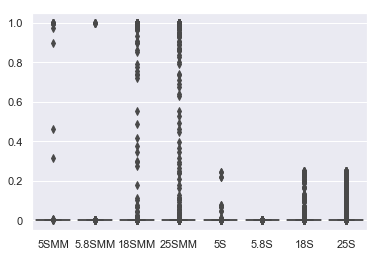

In [13]:
fig,ax = plt.subplots()
ax = sns.boxplot(data=values)
ylabels = [0,0.2,0.4,0.6,0.8,1.0]
ax.set_yticks(ylabels)
ax.set_yticklabels(ylabels)
fig.savefig("diffBUM_HMM_output_control_samples.pdf",dpi=400)

### Check if anything at all was modified in 5.8S and whether it makes sense with the structure!

#### Making 5.8S MM output file:

In [14]:
fiveeight["MM"].to_csv("5.8S_MM_values.txt",sep="\t",header=False)
eighteen["MM"].to_csv("18S_MM_values.txt",sep="\t",header=False)

In [15]:
totalmodnucs = len(eighteen[eighteen.MM >= 0.95])

### 253 out of the 1763 nucleotides with sufficient coverage were called modified in all three datasets:

In [16]:
totalmodnucs

253

In [17]:
totalnucs = len(eighteen.index)

In [18]:
totalnucs

1763

In [19]:
%%bash

DIR=../../Scripts

python $DIR/colorStructureFile.py \
-f "../../Analysis/Secondary_structure_diagrams/S_cerevisiae.svg" \
-d "18S_MM_values.txt" \
-c BUM_HMM \
-o "18S_MM_values.svg"


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### The control dataset is a DMS Structure-Seq dataset. So the expectation would be that mostly A's and C's would be called modified by difBUM_HMM. Check this!!!!:

In [20]:
refseq = "".join([i.strip() for i in open("../../Reference_sequences/18S_refseq.txt","r").readlines()])

In [21]:
refseq[:10]

'TATCTGGTTG'

In [22]:
len(refseq)

1800

In [23]:
significant = eighteen[eighteen.MM >= 0.95].index

In [24]:
nucdict = defaultdict(int)
for pos in significant:
    nuc = refseq[pos-1] ### index is 1-based, sequence is 0-based so subtract 1
    nucdict[nuc] += 1

In [25]:
nucdict

defaultdict(int, {'T': 35, 'G': 17, 'A': 154, 'C': 47})

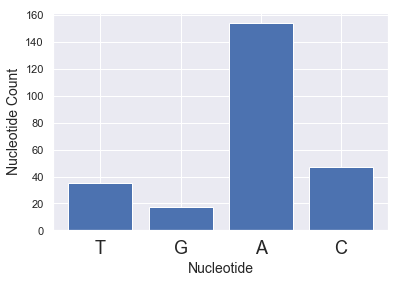

In [26]:
fig,ax = plt.subplots()
x = np.arange(len(nucdict.keys()))
y = nucdict.values()
ax.bar(x,y)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["T","G","A","C"],fontsize=18)
ax.set_ylabel("Nucleotide Count",fontsize=14)
ax.set_xlabel("Nucleotide",fontsize=14)
fig.savefig("18S_rRNA_control_MM_nucleotide_counts.pdf",dpi=400)